# Model Exploration
This notebook is used to compare and tune various models.

## Dependencies

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

## Data

In [2]:
dta = pd.read_csv('data/clean_data.csv')
dta = dta.fillna(0)
dta.shape

(686, 78)

In [3]:
# Available predictors
list(dta)

['Participant_ID',
 'Category',
 'Age_yrs',
 'Age_category',
 'Education_yrs',
 'Education_category',
 'Sex',
 'Marital_status',
 'Income',
 'Occupation_class',
 'Living_area',
 'BP_sistol',
 'BP_diastol',
 'BMI',
 'GDS',
 'Glucose',
 'Triglyceride',
 'HDL',
 'Hypertension',
 'BMI_category',
 'Diabetes',
 'Tri_200',
 'HDL_40',
 'Smoking_status',
 'Stroke',
 'Depression',
 'INA_AD8',
 'ADL',
 'AMT',
 'Intellectual_1',
 'Intellectual_2',
 'Intellectual_3',
 'Intellectual_4',
 'Intellectual_5',
 'Intellectual_6',
 'Intellectual_7',
 'Intellectual_8',
 'Social_1',
 'Social_2',
 'Social_3',
 'Social_4',
 'Social_5',
 'Social_6',
 'Social_7',
 'Social_8',
 'Social_9',
 'Recreational_1',
 'Recreational_2',
 'Recreational_3',
 'Recreational_4',
 'Recreational_5',
 'Recreational_6',
 'Recreational_7',
 'Recreational_8',
 'Physical_1',
 'Physical_2',
 'Physical_3',
 'Physical_4',
 'Physical_5',
 'Intellectually_active',
 'Socially_active',
 'Recreationally_active',
 'Physically_active',
 'Total_

In [4]:
dta_copy = dta.copy()
intell = []
for row in dta_copy['Intellectually_active']:
    if row == 'active': intell.append(1)
    else: intell.append(0)
dta_copy['Active_intellectually'] = intell

In [5]:
social = []
for row in dta_copy['Socially_active']:
    if row == 'active': social.append(1)
    else: social.append(0)
dta_copy['Active_socially'] = social

In [6]:
recrea = []
for row in dta_copy['Recreationally_active']:
    if row == 'active': recrea.append(1)
    else: recrea.append(0)
dta_copy['Active_recreationally'] = recrea

In [7]:
physi = []
for row in dta_copy['Physically_active']:
    if row == 'active': physi.append(1)
    else: physi.append(0)
dta_copy['Active_physically'] = physi

In [8]:
total = []
for row in dta_copy['Total_active']:
    if row == 'active': total.append(1)
    else: total.append(0)
dta_copy['Active_total'] = total

In [9]:
dta_copy.head(10)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,0,1,1,0,1
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,1,1,1,1,1
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,0,0,0,0,0,1,1,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent,0,1,1,0,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,0,1,0,0,1
5,80006,Dementia,78.0,>75,0.0,0-6 years,Female,Married,No Income,housewife,...,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent,0,0,1,1,1
6,80007,Normal,75.0,>75,6.0,0-6 years,Female,Single,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,0,0,1,1,1
7,80009,Normal,64.0,60-74,4.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,0,0,0,0,0,1,0,0,0
8,80010,Dementia,66.0,60-74,2.0,0-6 years,Female,Single,No Income,notworking,...,Non-Frequent,0,0,0,0,1,1,1,0,0
9,80011,Dementia,73.0,60-74,0.0,0-6 years,Female,Single,No Income,housewife,...,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent,0,0,1,0,1


In [10]:
mar_dummies = pd.get_dummies(dta_copy.Marital_status)
dta_copy = pd.concat([dta_copy.drop(['Marital_status'],axis=1),mar_dummies],axis=1)
dta_copy.head()

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Income,Occupation_class,Living_area,...,Tempe,Tempe_category,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total,0,Married,Single
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,No Income,housewife,Rural,...,Few times/week,Non-Frequent,0,1,1,0,1,0,1,0
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,< monthly minimum wage,profesional,Rural,...,Few times/week,Non-Frequent,1,1,1,1,1,0,0,1
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,No Income,housewife,Rural,...,0,0,0,1,1,1,0,0,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,≥ monthly minimum wage,housewife,Rural,...,Few times/week,Non-Frequent,0,1,1,0,0,0,1,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,No Income,housewife,Rural,...,Sometimes,Non-Frequent,0,1,0,0,1,0,1,0


In [11]:
sex_dummies = pd.get_dummies(dta_copy.Sex)
dta_copy = pd.concat([dta_copy.drop(['Sex'],axis=1),sex_dummies],axis=1)
dta_copy.head()

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Income,Occupation_class,Living_area,BP_sistol,...,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total,0,Married,Single,Female,Male
0,80001,Dementia,70.0,60-74,3.0,0-6 years,No Income,housewife,Rural,150.0,...,0,1,1,0,1,0,1,0,1,0
1,80002,Normal,63.0,60-74,0.0,0-6 years,< monthly minimum wage,profesional,Rural,140.0,...,1,1,1,1,1,0,0,1,1,0
2,80003,Normal,64.0,60-74,6.0,0-6 years,No Income,housewife,Rural,150.0,...,0,1,1,1,0,0,1,0,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,≥ monthly minimum wage,housewife,Rural,120.0,...,0,1,1,0,0,0,1,0,1,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,No Income,housewife,Rural,210.0,...,0,1,0,0,1,0,1,0,1,0


In [12]:
cat_dummies = pd.get_dummies(dta_copy.Category)
dta_copy = pd.concat([dta_copy.drop(['Category'],axis=1),cat_dummies],axis=1)
dta_copy.head()

,Participant_ID,Age_yrs,Age_category,Education_yrs,Education_category,Income,Occupation_class,Living_area,BP_sistol,BP_diastol,...,Active_recreationally,Active_physically,Active_total,0,Married,Single,Female,Male,Dementia,Normal
0,80001,70.0,60-74,3.0,0-6 years,No Income,housewife,Rural,150.0,60.0,...,1,0,1,0,1,0,1,0,1,0
1,80002,63.0,60-74,0.0,0-6 years,< monthly minimum wage,profesional,Rural,140.0,90.0,...,1,1,1,0,0,1,1,0,0,1
2,80003,64.0,60-74,6.0,0-6 years,No Income,housewife,Rural,150.0,100.0,...,1,1,0,0,1,0,1,0,0,1
3,80004,62.0,60-74,6.0,0-6 years,≥ monthly minimum wage,housewife,Rural,120.0,80.0,...,1,0,0,0,1,0,1,0,0,1
4,80005,78.0,>75,3.0,0-6 years,No Income,housewife,Rural,210.0,100.0,...,0,0,1,0,1,0,1,0,1,0


In [13]:
# Breakdown of categories - dementia vs. no dementia
dta_copy.Dementia.value_counts()

0    486
1    200
Name: Dementia, dtype: int64

In [14]:
sample = dta_copy.groupby("Dementia").sample(n=200, random_state=1988)

In [15]:
sample.Dementia.value_counts()

0    200
1    200
Name: Dementia, dtype: int64

In [16]:
# Split data

# OUTCOME: whether or not someone has dementia (category)
y = sample['Dementia']
# PREDICTORS:
X = sample[['Age_yrs',
 'Education_yrs',
 'Married', 
 'BP_sistol',
 'BP_diastol',
 'BMI',
 'GDS',
 'Glucose',
 'Triglyceride',
 'HDL',
 'INA_AD8',
 'ADL',
 'AMT', 
 'Active_intellectually',
 'Active_socially',
 'Active_recreationally',
 'Active_physically',
 'Active_total']] 

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)
# Look at the training data
train_X.shape 

(300, 18)

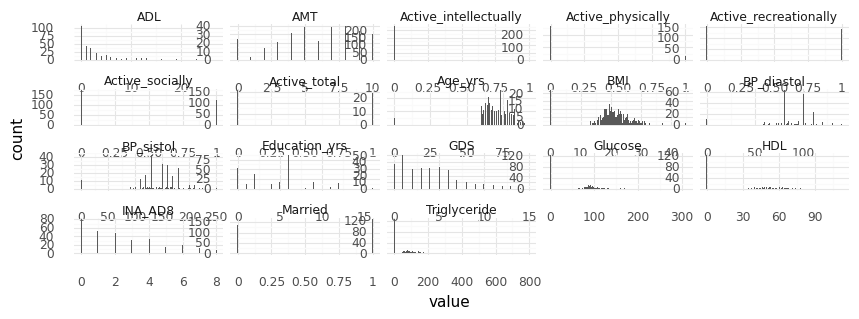

<ggplot: (8777305502708)>

In [18]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

In [19]:
# Let's rescale our training data
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [20]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,Age_yrs,Education_yrs,Married,BP_sistol,BP_diastol,BMI,GDS,Glucose,Triglyceride,HDL,INA_AD8,ADL,AMT,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total
0,0.720430,0.7500,0.0,0.68,0.571429,0.640677,0.266667,0.352751,0.169173,0.357143,0.000,0.000000,0.9,1.0,1.0,0.0,0.0,1.0
1,0.000000,0.3750,0.0,0.48,0.500000,0.615505,0.466667,0.313916,0.184211,0.446429,0.000,0.000000,0.9,1.0,1.0,1.0,1.0,1.0
2,0.827957,0.3750,1.0,0.44,0.428571,0.393852,0.400000,0.000000,0.000000,0.000000,0.750,0.259259,0.5,0.0,1.0,1.0,1.0,0.0
3,0.698925,0.1875,0.0,0.92,0.785714,0.593673,0.266667,0.000000,0.000000,0.000000,1.000,0.074074,0.6,0.0,0.0,1.0,0.0,1.0
4,0.838710,0.1875,1.0,0.60,0.571429,0.374025,0.533333,0.313916,0.192982,0.669643,0.625,0.111111,0.7,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.752688,0.5625,0.0,0.52,0.500000,0.632212,0.200000,0.000000,0.000000,0.000000,0.250,0.000000,1.0,1.0,1.0,1.0,0.0,1.0
296,0.860215,0.9375,0.0,0.68,0.642857,0.391401,0.400000,0.343042,0.122807,0.410714,0.125,0.518519,0.0,1.0,1.0,0.0,0.0,1.0
297,0.645161,0.3750,1.0,0.56,0.700000,0.662286,0.400000,0.546926,0.467419,0.366071,0.625,0.074074,0.5,0.0,0.0,0.0,0.0,1.0
298,0.731183,0.2500,1.0,0.52,0.642857,0.455558,0.266667,0.000000,0.000000,0.000000,0.125,0.000000,0.6,0.0,0.0,1.0,0.0,1.0


In [21]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1988)

In [22]:
use_metrics = ["neg_mean_squared_error"]

In [23]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [24]:
# Output is a dictionary 
lm_scores

{'fit_time': array([0.00330019, 0.00172806, 0.00179815, 0.00139594, 0.00138402]),
 'score_time': array([0.0013299 , 0.00101185, 0.00095582, 0.00095296, 0.0009439 ]),
 'test_neg_mean_squared_error': array([-0.1342868 , -0.16450549, -0.14003898, -0.17564218, -0.15956732])}

In [25]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,0.134287
1,lm,0.164505
2,lm,0.140039
3,lm,0.175642
4,lm,0.159567
5,knn,0.160667
6,knn,0.188000
7,knn,0.236000
8,knn,0.202000
9,knn,0.225333


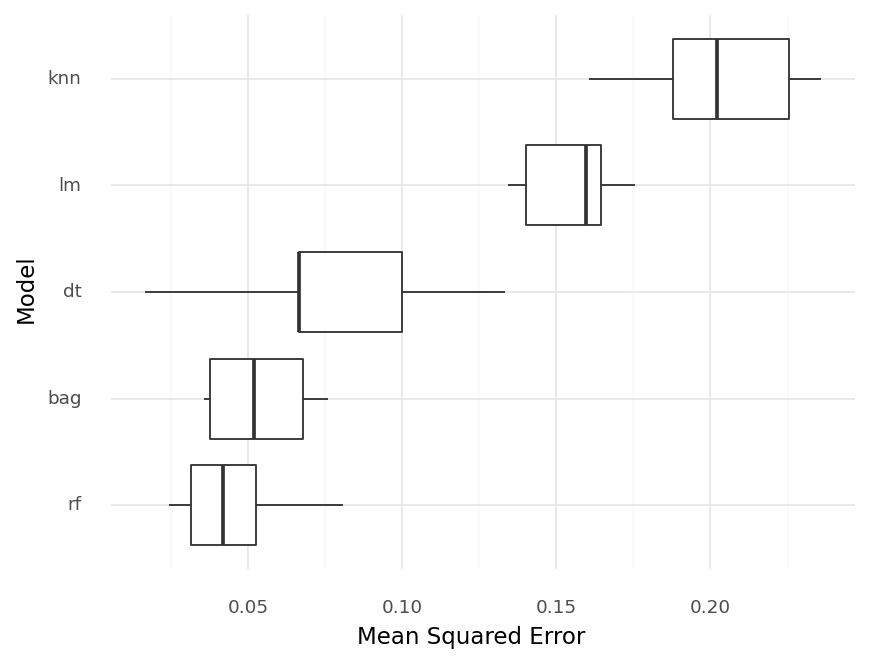

<ggplot: (8777311743476)>

In [26]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

In [27]:
# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1988)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['Age_yrs',
 'Education_yrs',
 'Married', 
 'BP_sistol',
 'BP_diastol',
 'BMI',
 'GDS',
 'Glucose',
 'Triglyceride',
 'HDL',
 'INA_AD8',
 'ADL',
 'AMT', 
 'Active_intellectually',
 'Active_socially',
 'Active_recreationally',
 'Active_physically',
 'Active_total'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1988, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Age_yrs',
                                                                          'Education_yrs',
                                                                          'Married',
                                                                          'BP_sistol',
                                                                          'BP_diastol',
                                                                          'BMI',
                                                                          'GDS',
                                                                          'Glucose',
                         

In [28]:
search.best_score_ # Mean out-of-sample (CV) error

-0.048266666666666666

In [29]:
search.best_params_

{'model': BaggingRegressor()}

In [30]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [31]:
m.mean_squared_error(test_y,pred_y)

0.0548

In [32]:
m.r2_score(test_y,pred_y)

0.7800080289040545

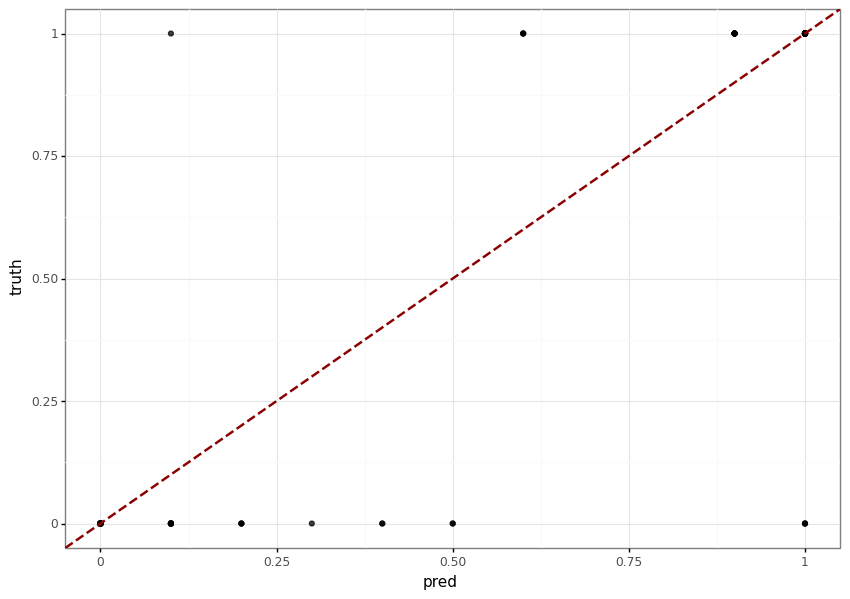

<ggplot: (8777278856186)>

In [33]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)